<a href="https://colab.research.google.com/github/MariaPompiani/basic-basket-2025-analysis/blob/main/extensao2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Extenção da Cesta Básica (ICB_2s-2025)
*Disciplina:* Aprendizado Supervisionado — Prof. Fernando  
*Aluno:* Maria Eduarda Sousa Araujo Pompiani Costa  
*Aluno:* Matheus Rodrigues Gomes

In [48]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. ANALISE EXPLORATORIA**

In [49]:
#data = pd.read_excel('/content/drive/MyDrive/ICB_2s-2025.xlsx')
data = pd.read_excel("ICB_2s-2025.xlsx")
data.head(100)

,Data_Coleta,Estabelecimento,Produto,Marca,Preco,Quantidade,PPK
0,2022-09-12,SUP-0,Leite,Parmalat,6.28,1.0,6.280000
1,2022-09-12,SUP-1,Tomate,NaN,6.99,1.0,6.990000
2,2022-09-12,SUP-2,Arroz,Namorado,17.98,5.0,3.596000
3,2022-09-12,SUP-2,Arroz,Broto Legal,22.69,5.0,4.538000
4,2022-09-12,SUP-0,Feijão,Broto Legal,10.98,1.0,10.980000
...,...,...,...,...,...,...,...
95,2022-09-12,SUP-3,Café,Melita,20.98,0.5,41.960000
96,2022-09-12,SUP-2,Óleo,Soya,7.85,0.9,8.722222
97,2022-09-12,SUP-1,Manteiga,Tirolez,29.89,0.5,59.780000
98,2022-09-12,SUP-0,Café,Pilão,18.69,0.5,37.380000


In [50]:
data.describe()

,Data_Coleta,Preco,Quantidade,PPK
count,34032,34032.000000,34032.000000,34032.000000
mean,2024-04-02 13:55:46.121297664,13.780066,1.379653,19.659848
min,2022-09-12 00:00:00,1.190000,0.200000,0.449500
25%,2023-06-20 00:00:00,5.900000,0.900000,5.583000
50%,2024-04-10 00:00:00,8.990000,1.000000,7.655556
75%,2025-01-20 00:00:00,18.380000,1.000000,29.960000
max,2025-09-22 00:00:00,64.990000,60.000000,147.500000
std,NaN,10.581267,1.662825,22.913911


In [51]:
data.describe(include='object')

,Estabelecimento,Produto,Marca
count,34032,34032,27637
unique,41,27,168
top,SUP-21,Café,Broto Legal
freq,1362,4122,1570


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34032 entries, 0 to 34031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data_Coleta      34032 non-null  datetime64[ns]
 1   Estabelecimento  34032 non-null  object        
 2   Produto          34032 non-null  object        
 3   Marca            27637 non-null  object        
 4   Preco            34032 non-null  float64       
 5   Quantidade       34032 non-null  float64       
 6   PPK              34032 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.8+ MB


# **1. Somente a variavel marca tem produtos nulos, como vamos tratar isso?**
- todos que forem nulos recebem um valor novo para marca, tipo 'sem marca'

In [53]:
data["Marca"] = data["Marca"].fillna("Sem marca definida")
#Substitui os Nan tudo por Sem marca definida

# **Perguntas**

**1. Previsão de preços futuros de todos os produtos no geral**
- separar cada produto, ver o comportamento deles.
- realizar os tratamentos para aplicar os algoritmos de series temporais
- analisar o erro
- fazer a previsão



In [54]:
data['Produto'].nunique()

27

Notamos que alguns valores aparecem de forma provavelmente duplicados. Como farinha e farinha de trigo. Para isso iremos investigar.

In [55]:
data['Produto'].value_counts()

,count
Produto,
Café,4122
Arroz,4015
Manteiga,3645
Feijão,3602
Leite,3490
Farinha,3199
Óleo,2466
Açúcar,2420
Tomate,1027


- Farinha será considerado Farinha de Trigo
- Carne Coxão Mole será Carne Bovina Coxão Mole
- Carne Pernil será Carne Suina Pernil
- Parne Acem e Carne Acém será Carne Bovina Acem
- Pão sera Pao Frances

In [56]:
data['Produto'] = data['Produto'].replace('Farinha', 'Farinha de Trigo')
data['Produto'] = data['Produto'].replace('Carne Coxão Mole', 'Carne Bovina Coxão Mole')
data['Produto'] = data['Produto'].replace('Carne Pernil', 'Carne Suína Pernil')
data['Produto'] = data['Produto'].replace('Carne Acém', 'Carne Bovina Acem')
data['Produto'] = data['Produto'].replace('Carne Acem', 'Carne Bovina Acem')
data['Produto'] = data['Produto'].replace('Pão', 'Pão Francês')
data['Produto'] = data['Produto'].replace('Macarrão com Ovos', 'Macarrão')

In [57]:
data['Produto'].value_counts()

,count
Produto,
Café,4122
Arroz,4015
Manteiga,3645
Feijão,3602
Leite,3490
Farinha de Trigo,3271
Óleo,2466
Açúcar,2420
Tomate,1027


Os nomes dos produtos foram atualizados para pertercerem ao mesmo grupo e manterem o padrão.

In [58]:
data.head()

,Data_Coleta,Estabelecimento,Produto,Marca,Preco,Quantidade,PPK
0,2022-09-12,SUP-0,Leite,Parmalat,6.28,1.0,6.280
1,2022-09-12,SUP-1,Tomate,Sem marca definida,6.99,1.0,6.990
2,2022-09-12,SUP-2,Arroz,Namorado,17.98,5.0,3.596
3,2022-09-12,SUP-2,Arroz,Broto Legal,22.69,5.0,4.538
4,2022-09-12,SUP-0,Feijão,Broto Legal,10.98,1.0,10.980


In [59]:
data["PPK_medio"] = data.groupby(["Data_Coleta", "Produto"])["PPK"].transform("mean")
#Esse codigo vai ignorar as marcas já que elas nao mudam, e vai fazer uma média por dia levando em consideração as datas e os preços só
#Escolhi usar PPK porque em produtos como carne,arroz faz mais sentido

# **OS CODIGOS AQUI DE BAIXO VÃO PARA ANALISE EXPLORATRORIA É QUE EU QUERO TESTAR COM OS PRODUTOS PADRONIZADOS**

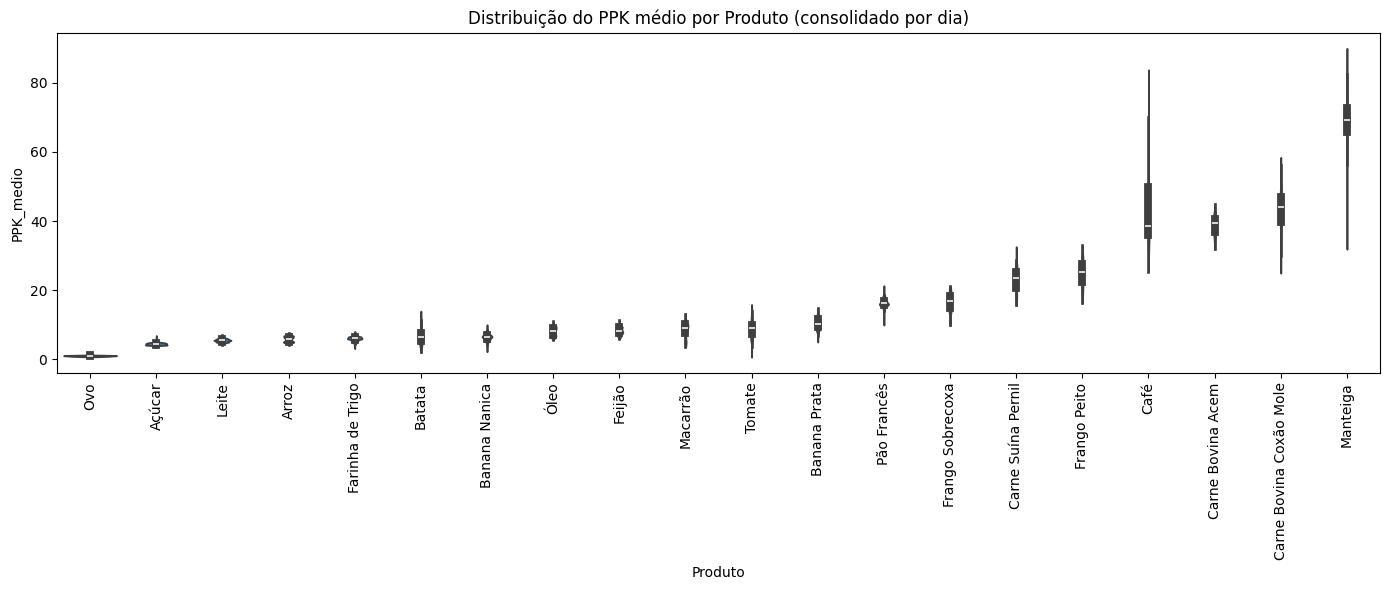

In [60]:
plt.figure(figsize=(14,6))
ordem = data.groupby('Produto')["PPK_medio"].median().sort_values().index
sns.violinplot(data=data, x='Produto', y='PPK_medio', order=ordem, cut=0)
plt.xticks(rotation=90)
plt.title("Distribuição do PPK médio por Produto (consolidado por dia)")
plt.tight_layout()
plt.show()
#Aqui eu quis entender como o preço por quilo varia entre os produtos ao longo do tempo, usei isso ai porque não gosto de boxplot

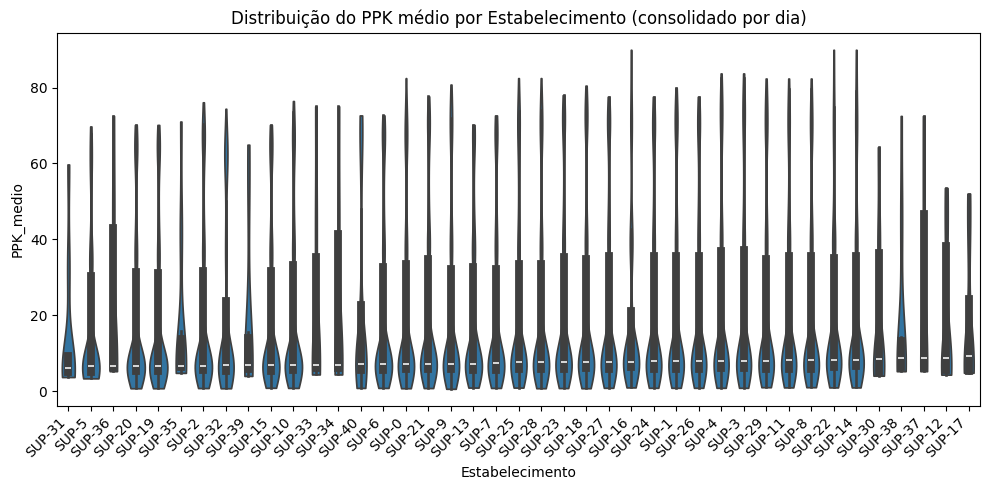

In [61]:
plt.figure(figsize=(10,5))
ordem = data.groupby('Estabelecimento')["PPK_medio"].median().sort_values().index
sns.violinplot(data=data, x='Estabelecimento', y='PPK_medio', order=ordem, cut=0)
plt.xticks(rotation=45, ha='right')
plt.title("Distribuição do PPK médio por Estabelecimento (consolidado por dia)")
plt.tight_layout()
plt.show()
#Aqui eu quis comparar como os mercados diferem entre si nos preços dos produtos, usei isso ai porque não gosto de boxplot

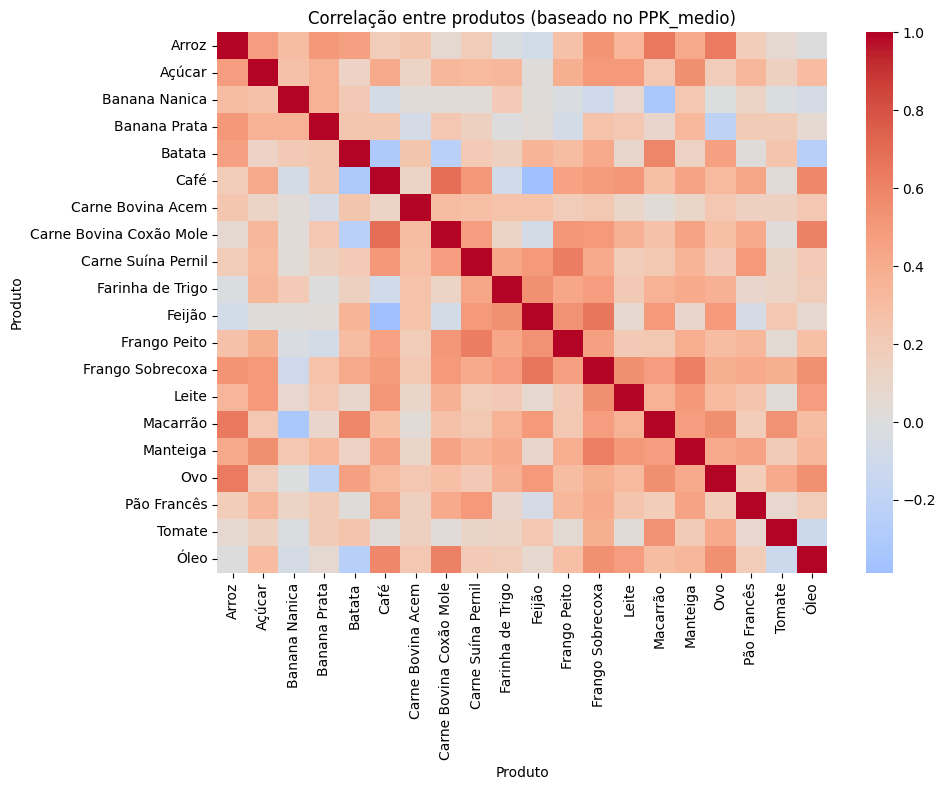

In [62]:
piv = data.pivot_table(
    index="Data_Coleta",
    columns="Produto",
    values="PPK_medio",
    aggfunc="mean"
)

corr = piv.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlação entre produtos (baseado no PPK_medio)")
plt.tight_layout()
plt.show()
#Aqui eu quis descobrir quais produtos tendem a subir ou cair de preço juntos.

# **CODIGO PARA GERAR TODOS OS POSSIVEIS GRAFICOS QUE PRECISARMOS**

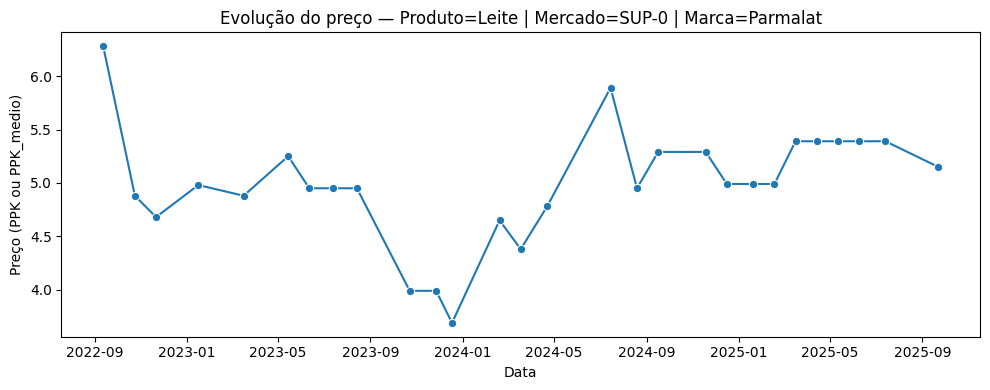

In [73]:
#AQUI ESCOLHEMOS OQUE QUEREMOS VER NO GRAFICO
produto = "Leite"          # Unica variavel obrigatoria
estabelecimento = 'SUP-0'             # Escolhe o mercado ou coloca None para ver no geral
marca = 'Parmalat'            # Escolhe o marca ou coloca None para ver no geral


# FILTRO OBRIGATÓRIO POR PRODUTO
filtro_Produto = data[data["Produto"] == produto].copy()

usa_ppk_medio = (estabelecimento is None) and (marca is None)

#Se for so o produto usamos PPK_medio que fiz la tras
if usa_ppk_medio:
    serie = (
        filtro_Produto.groupby("Data_Coleta")["PPK_medio"]
          .mean()
          .reset_index(name="Y")
    )
else:
    f = filtro_Produto.copy()
#Aqui é se especificarmos estabelecimento e marca
    if estabelecimento is not None:
        f = f[f["Estabelecimento"] == estabelecimento]

    if marca is not None:
        f = f[f["Marca"] == marca]

    serie = (
        f.groupby("Data_Coleta")["PPK"]
         .mean()
         .reset_index(name="Y")
    )

plt.figure(figsize=(10,4))
sns.lineplot(data=serie, x="Data_Coleta", y="Y", marker="o")
plt.title(f"Evolução do preço — Produto={produto}"
          + (f" | Mercado={estabelecimento}" if estabelecimento else "")
          + (f" | Marca={marca}" if marca else "")
         )
plt.xlabel("Data")
plt.ylabel("Preço (PPK ou PPK_medio)")
plt.tight_layout()
plt.show()

